# Regression

## Linear Regression

### problem defination
- profit of a startup

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [32]:
df = pd.read_csv('50_Startups.csv')

In [33]:
df.head(3)

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


# EDA

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
df.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [36]:
# dependant variable : profit

In [37]:
df.isna().sum().sum()

0

In [38]:
# remove 'State' as it is textual
df.drop('State',axis =1,inplace = True)

In [39]:
df.cov()

,RnD,Administration,Marketing,Profit
RnD,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [40]:
#find independatnat variable
df.corr()

,RnD,Administration,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [41]:
#find independatnat variable using graphical method

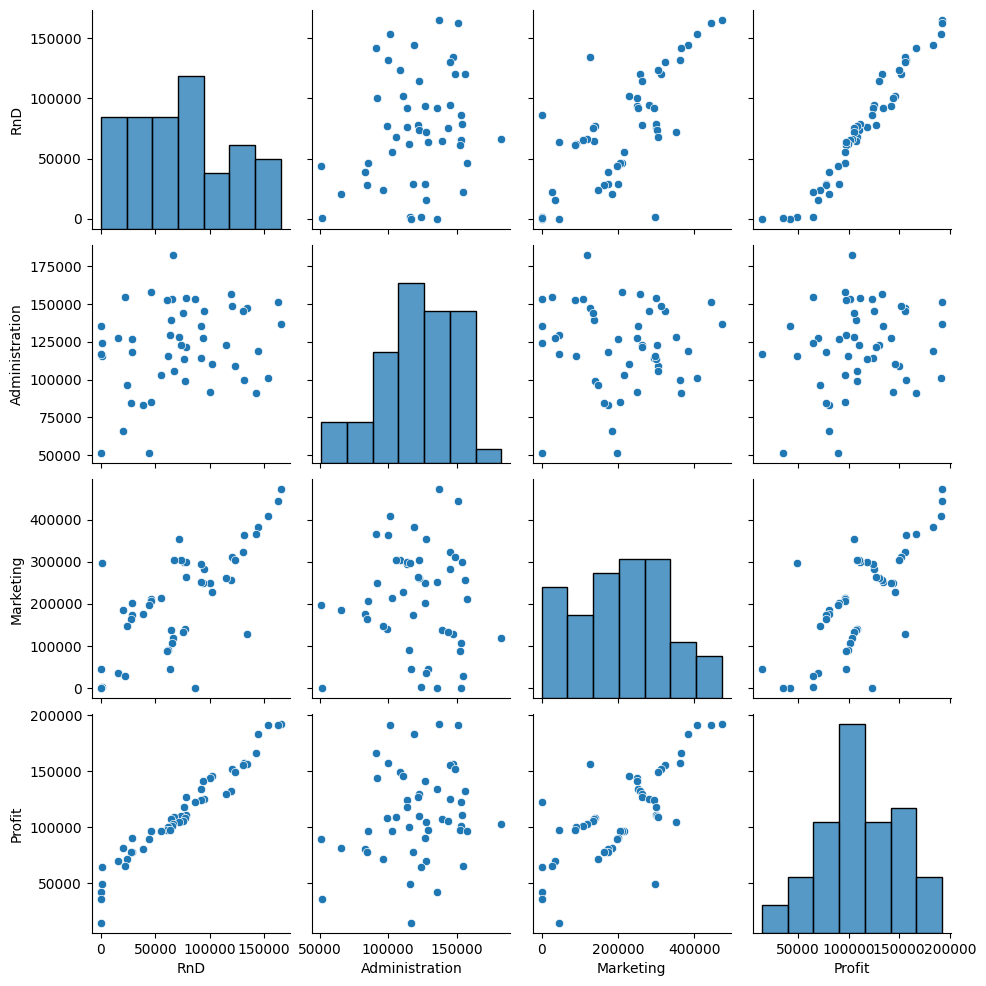

In [42]:
sns.pairplot(df)

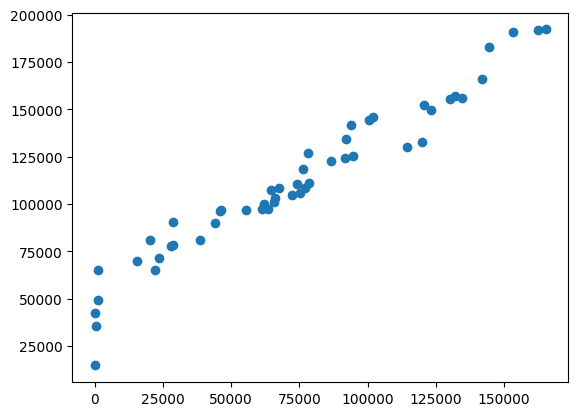

In [43]:
plt.scatter(df['RnD'],df['Profit'])

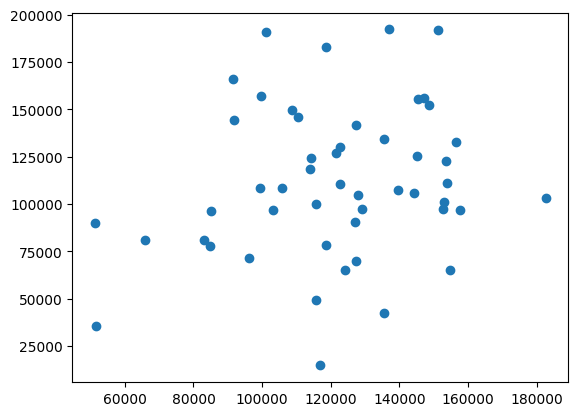

In [44]:
plt.scatter(df['Administration'],df['Profit'])

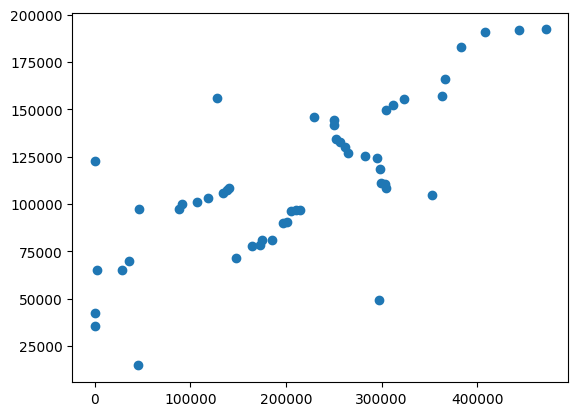

In [45]:
plt.scatter(df['Marketing'],df['Profit'])

### data preprocessing

In [46]:
x = df.drop('Profit',axis = 1)
y = df['Profit']

In [47]:
from sklearn.linear_model import LinearRegression

### Multiple Linear Regression

In [48]:
reg_model = LinearRegression()
reg_model.fit(x,y)

LinearRegression()

### reduce 3 independant variables into 1

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=1)
reduced_x = pca.fit_transform(x)

In [52]:
reduced_x

array([[ 275938.82938581],
       [ 248371.41318817],
       [ 211342.97323503],
       [ 185039.27529634],
       [ 168084.83912996],
       [ 162050.1719024 ],
       [ -63097.19227455],
       [ 124109.72127534],
       [ 109611.4455505 ],
       [ 104069.26015231],
       [  25279.96136451],
       [  44728.02492022],
       [  42879.57003724],
       [  45062.2396167 ],
       [  56512.31663047],
       [  60101.39859905],
       [  52407.7249209 ],
       [  74519.23906144],
       [  85605.71528212],
       [-199189.84613364],
       [  84889.65111307],
       [  86464.63694506],
       [  88720.40245824],
       [  88335.08630106],
       [ -66713.3031837 ],
       [ -72718.56128809],
       [ -73513.68133264],
       [ 136082.43247978],
       [ -91417.66822986],
       [-102079.44970905],
       [-118412.3156372 ],
       [-121495.40152681],
       [-161301.12590955],
       [  -1584.01608271],
       [  -7861.99278096],
       [ -12957.17530624],
       [ -22056.67095831],
 

### create a new model using reduced_X

In [53]:
vis_model  = LinearRegression()
vis_model.fit(reduced_x,y)


LinearRegression()

## result visualization

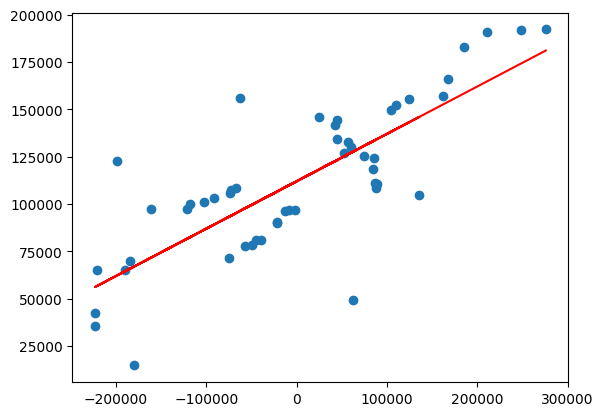

In [57]:
plt.scatter(reduced_x,y)
y_vis = vis_model.predict(reduced_x)
plt.plot(reduced_x,y_vis,color = 'red')